Para este proyecto de carga y preprocesamiento de datos vamos a descargar un set de datos de Kaggle.

Objetivo:
- Cargar el set de datos
- Crear el df con la información del set
- Pre-procesamiento de los datos: eliminar/reparar valores nulos
- Análisis de los datos 

### 0. Importa las librerías

In [135]:
import os
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
# Cambiar las opciones de pandas para que nos muestre todas las columnas
pd.set_option('display.max_columns', None)

### 1. Importa los datos

In [137]:
# Método para importar
data = pd.read_csv(r'C:\Users\kina5\Desktop\Bootcamp\Temario\Modulo_1\06-Preprocesamiento_datos\practica_anime\Data\Anime.csv') 

# He copiado la ruta del csv con copy path
# La r nos permite movernos entre directorios cuando damos una orden

### 2. Crea el dataframe

In [138]:
# Creamos el dataframe
df = pd.DataFrame(data=data)
df.head()

,animeID,name,title_english,title_japanese,title_synonyms,type,source,producers,genre,studio,episodes,status,airing,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,synopsis,background,premiered,broadcast,related
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,[],TV,Original,['Bandai Visual'],"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",['Sunrise'],26.0,Finished Airing,False,"{'from': '1998-04-03T00:00:00+00:00', 'to': '1...",24 min per ep,R - 17+ (violence & profanity),8.81,405664.0,26.0,39.0,795733.0,43460.0,"In the year 2071, humanity has colonized sever...",When Cowboy Bebop first aired in spring of 199...,Spring 1998,Saturdays at 01:00 (JST),"{'Adaptation': [{'mal_id': 173, 'type': 'manga..."
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,"[""Cowboy Bebop: Knockin' on Heaven's Door""]",Movie,Original,"['Sunrise', 'Bandai Visual']","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",['Bones'],1.0,Finished Airing,False,"{'from': '2001-09-01T00:00:00+00:00', 'to': No...",1 hr 55 min,R - 17+ (violence & profanity),8.41,120243.0,164.0,449.0,197791.0,776.0,"Another day, another bounty—such is the life o...",NaN,NaN,NaN,"{'Parent story': [{'mal_id': 1, 'type': 'anime..."
2,6,Trigun,Trigun,トライガン,[],TV,Manga,['Victor Entertainment'],"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",['Madhouse'],26.0,Finished Airing,False,"{'from': '1998-04-01T00:00:00+00:00', 'to': '1...",24 min per ep,PG-13 - Teens 13 or older,8.30,212537.0,255.0,146.0,408548.0,10432.0,"Vash the Stampede is the man with a $$60,000,0...",The Japanese release by Victor Entertainment h...,Spring 1998,Thursdays at 01:15 (JST),"{'Adaptation': [{'mal_id': 703, 'type': 'manga..."
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN,['WHR'],TV,Original,['Bandai Visual'],"['Action', 'Magic', 'Police', 'Supernatural', ...",['Sunrise'],26.0,Finished Airing,False,"{'from': '2002-07-02T00:00:00+00:00', 'to': '2...",25 min per ep,PG-13 - Teens 13 or older,7.33,32837.0,2371.0,1171.0,79397.0,537.0,Witches are individuals with special powers li...,NaN,Summer 2002,Tuesdays at Unknown,{}
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,['Adventure King Beet'],TV,Manga,"['TV Tokyo', 'Dentsu']","['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",['Toei Animation'],52.0,Finished Airing,False,"{'from': '2004-09-30T00:00:00+00:00', 'to': '2...",23 min per ep,PG - Children,7.03,4894.0,3544.0,3704.0,11708.0,14.0,It is the dark century and the people are suff...,NaN,Fall 2004,Thursdays at 18:30 (JST),"{'Adaptation': [{'mal_id': 1348, 'type': 'mang..."


## PRE-PROCESAMIENTO

### 3. ¿Cómo vienen representadas las variables? ¿Qué tipos de datos tenemos?

In [139]:
data.info() # Para ver el tipo de datos del conjunto de datos Anime
# df.dtypes # Tipos de variables del conjunto de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15278 entries, 0 to 15277
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   animeID          15278 non-null  int64  
 1    name            15278 non-null  object 
 2    title_english   6122 non-null   object 
 3    title_japanese  15230 non-null  object 
 4    title_synonyms  15273 non-null  object 
 5    type            15273 non-null  object 
 6    source          15273 non-null  object 
 7    producers       15273 non-null  object 
 8    genre           15273 non-null  object 
 9    studio          15273 non-null  object 
 10   episodes        14732 non-null  float64
 11   status          15273 non-null  object 
 12   airing          15273 non-null  object 
 13   aired           15273 non-null  object 
 14   duration        15273 non-null  object 
 15   rating          15273 non-null  object 
 16   score           14778 non-null  float64
 17   scored_by  

<Axes: >

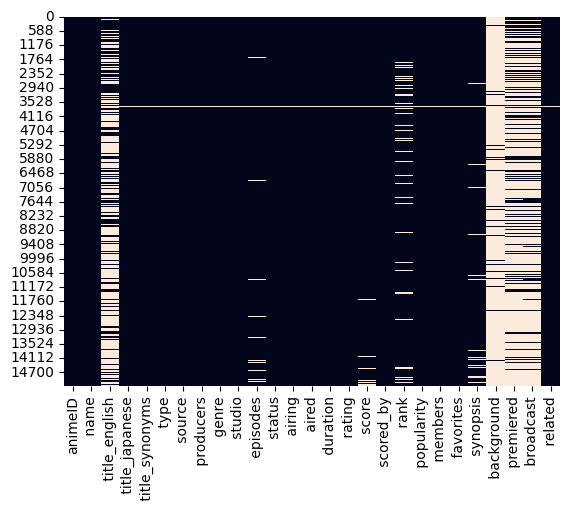

In [140]:
sns.heatmap(df.isnull(), cbar=False) # Vemos los nulos con un gráfico heatmap

In [141]:
df.describe().transpose() # Ver los parámetros descriptivos de esos datos

,count,mean,std,min,25%,50%,75%,max
animeID,15278.0,19002.639416,13706.437012,1.0,5209.25,18308.00,33025.75,39199.0
episodes,14732.0,11.726378,49.939231,1.0,1.00,2.00,12.00,3057.0
score,14778.0,6.284508,1.073349,1.0,5.60,6.37,7.05,10.0
scored_by,15273.0,12107.014601,46929.422586,0.0,47.00,470.00,3857.00,1107955.0
rank,13669.0,6917.408004,4003.814986,0.0,3448.00,6932.00,10416.00,13838.0
popularity,15273.0,7741.991292,4482.323035,0.0,3855.00,7769.00,11627.00,15474.0
members,15273.0,24507.209651,82236.723016,0.0,244.00,1630.00,10472.00,1610561.0
favorites,15273.0,329.457016,2829.335394,0.0,0.00,2.00,23.00,120331.0


### 4. Vamos a reparar los nombres de las columnas, eliminando los espacios previos

In [142]:
df.columns # Vemos que en algunos hay un espacio antes del nombre. Hay que quitarlo

Index(['animeID', ' name', ' title_english', ' title_japanese',
       ' title_synonyms', ' type', ' source', ' producers', ' genre',
       ' studio', ' episodes', ' status', ' airing', ' aired', ' duration',
       ' rating', ' score', ' scored_by', ' rank', ' popularity', ' members',
       ' favorites', ' synopsis', ' background', ' premiered', ' broadcast',
       ' related'],
      dtype='object')

In [143]:
data.columns = data.columns.str.strip() # Con strip() eliminamos los espacios en blanco que haya antes o después

In [144]:
df.columns # Vemos que ya no hay espacios en blanco

Index(['animeID', 'name', 'title_english', 'title_japanese', 'title_synonyms',
       'type', 'source', 'producers', 'genre', 'studio', 'episodes', 'status',
       'airing', 'aired', 'duration', 'rating', 'score', 'scored_by', 'rank',
       'popularity', 'members', 'favorites', 'synopsis', 'background',
       'premiered', 'broadcast', 'related'],
      dtype='object')

### 5. Comprueba los valores nulos y repetidos

In [145]:
df.isnull().sum() # Contamos el número de valores nulos del df

animeID               0
name                  0
title_english      9156
title_japanese       48
title_synonyms        5
type                  5
source                5
producers             5
genre                 5
studio                5
episodes            546
status                5
airing                5
aired                 5
duration              5
rating                5
score               500
scored_by             5
rank               1609
popularity            5
members               5
favorites             5
synopsis            713
background        14160
premiered         11099
broadcast         10876
related               5
dtype: int64

In [146]:
data.duplicated().sum() # Vemos que no hay duplicados

0

### 6. Qué porcentaje de valores nulos hay en cada columna, cuáles eliminamos y cuáles queremos reparar

In [147]:
df.isnull().sum() / len(df) * 100

animeID            0.000000
name               0.000000
title_english     59.929310
title_japanese     0.314177
title_synonyms     0.032727
type               0.032727
source             0.032727
producers          0.032727
genre              0.032727
studio             0.032727
episodes           3.573766
status             0.032727
airing             0.032727
aired              0.032727
duration           0.032727
rating             0.032727
score              3.272680
scored_by          0.032727
rank              10.531483
popularity         0.032727
members            0.032727
favorites          0.032727
synopsis           4.666841
background        92.682288
premiered         72.646943
broadcast         71.187328
related            0.032727
dtype: float64

In [148]:
# Vemos qué columnas tienen datos faltantes
missing_cols = list(df.isnull().sum(axis=0)[df.isnull().sum(axis=0)>0].index)

# df.isnull(): Esta expresión devuelve un DataFrame booleano donde cada celda indica si el valor correspondiente en el DataFrame original es nulo (True) o no (False).
# .sum(axis=0): Calcula la suma a lo largo del eje 0 (es decir, a lo largo de las filas) del DataFrame booleano resultante. Esto devuelve una Serie que contiene el número de valores nulos en cada columna.
# [df.isnull().sum(axis=0) > 0]: Esto filtra la Serie para mantener solo las entradas que tienen un recuento de valores nulos mayor que cero. Devuelve una Serie que contiene solo los recuentos de valores nulos para las columnas que tienen al menos un valor nulo.
# .index: Finalmente, esta parte extrae los nombres de las columnas de la Serie resultante. Devuelve una lista de nombres de columnas que tienen al menos un valor nulo.


In [149]:
# Filtramos las filas donde hay algún dato nulo, y las columnas donde están
df.loc[df.isnull().sum(axis=1)>0, missing_cols]


,title_english,title_japanese,title_synonyms,type,source,producers,genre,studio,episodes,status,airing,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,synopsis,background,premiered,broadcast,related
1,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,"[""Cowboy Bebop: Knockin' on Heaven's Door""]",Movie,Original,"['Sunrise', 'Bandai Visual']","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",['Bones'],1.0,Finished Airing,False,"{'from': '2001-09-01T00:00:00+00:00', 'to': No...",1 hr 55 min,R - 17+ (violence & profanity),8.41,120243.0,164.0,449.0,197791.0,776.0,"Another day, another bounty—such is the life o...",NaN,NaN,NaN,"{'Parent story': [{'mal_id': 1, 'type': 'anime..."
3,Witch Hunter Robin,Witch Hunter ROBIN,['WHR'],TV,Original,['Bandai Visual'],"['Action', 'Magic', 'Police', 'Supernatural', ...",['Sunrise'],26.0,Finished Airing,False,"{'from': '2002-07-02T00:00:00+00:00', 'to': '2...",25 min per ep,PG-13 - Teens 13 or older,7.33,32837.0,2371.0,1171.0,79397.0,537.0,Witches are individuals with special powers li...,NaN,Summer 2002,Tuesdays at Unknown,{}
4,Beet the Vandel Buster,冒険王ビィト,['Adventure King Beet'],TV,Manga,"['TV Tokyo', 'Dentsu']","['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",['Toei Animation'],52.0,Finished Airing,False,"{'from': '2004-09-30T00:00:00+00:00', 'to': '2...",23 min per ep,PG - Children,7.03,4894.0,3544.0,3704.0,11708.0,14.0,It is the dark century and the people are suff...,NaN,Fall 2004,Thursdays at 18:30 (JST),"{'Adaptation': [{'mal_id': 1348, 'type': 'mang..."
6,NaN,ハングリーハート Wild Striker,[],TV,Manga,[],"['Slice of Life', 'Comedy', 'Sports', 'Shounen']",['Nippon Animation'],52.0,Finished Airing,False,"{'from': '2002-09-11T00:00:00+00:00', 'to': '2...",23 min per ep,PG-13 - Teens 13 or older,7.67,9307.0,1186.0,3124.0,17145.0,210.0,Kyosuke Kano has lived under the shadow of his...,NaN,Fall 2002,Wednesdays at Unknown,"{'Adaptation': [{'mal_id': 4147, 'type': 'mang..."
7,NaN,頭文字〈イニシャル〉D FOURTH STAGE,['Initial D 4th Stage'],TV,Manga,"['OB Planning', 'Studio Jack']","['Action', 'Cars', 'Sports', 'Drama', 'Seinen']",['A.C.G.T.'],24.0,Finished Airing,False,"{'from': '2004-04-17T00:00:00+00:00', 'to': '2...",27 min per ep,PG-13 - Teens 13 or older,8.23,42555.0,298.0,1262.0,73438.0,635.0,Takumi Fujiwara and brothers Keisuke and Ryous...,NaN,Spring 2004,Unknown,"{'Adaptation': [{'mal_id': 375, 'type': 'manga..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15273,NaN,BEASTARS,[],TV,Manga,[],"['Slice of Life', 'Psychological', 'Drama', 'S...",[],NaN,Not yet aired,False,"{'from': None, 'to': None, 'prop': {'from': {'...",Unknown,None,NaN,0.0,NaN,14917.0,67.0,0.0,In a world populated by anthropomorphic animal...,NaN,NaN,Unknown,"{'Adaptation': [{'mal_id': 103701, 'type': 'ma..."
15274,NaN,魔入りました！入間くん,[],TV,Manga,[],"['Comedy', 'Demons', 'Supernatural', 'Fantasy'...",[],NaN,Not yet aired,False,"{'from': None, 'to': None, 'prop': {'from': {'...",Unknown,None,NaN,0.0,NaN,15231.0,59.0,0.0,Suzuki Iruma has been sold to the demon by his...,NaN,NaN,Unknown,"{'Adaptation': [{'mal_id': 104241, 'type': 'ma..."
15275,Karrimor Mountain Club,Karrimor Mountain Club,[],ONA,Original,[],"['Adventure', 'Slice of Life']",[],4.0,Finished Airing,False,"{'from': '2018-07-17T00:00:00+00:00', 'to': No...",1 min per ep,G - All Ages,NaN,0.0,11624.0,15424.0,10.0,0.0,A series of animated commercials produced by K...,NaN,NaN,NaN,{}
15276,NaN,彼方のアストラ,['Astra Lost in Space'],TV,Manga,[],"['Action', 'Sci-Fi', 'Shounen', 'Space']",['Lerche'],NaN,Not yet aired,False,"{'from': None, 'to': None, 'prop': {'from': {'...",Unknown,None,NaN,0.0,0.0,0.0,0.0,2.0,"The year is 2061, when space travel is now pos...",NaN,NaN,Unknown,"{'Adaptation': [{'mal_id': 98578, 'type': 'man..."


#### ***Reparación de valores nulos***

- ELIMINACIÓN: eliminamos las que tienen + de un 70% de nulos, porque luego no podríamos reparar (si tuvieramos pocos datos, cuidado en este punto)

In [150]:
# Eliminar columnas con más de un 70 % de nulos
df = df.dropna(axis=1, thresh=0.7*len(df)) # axis = 1 busca a lo largo de la fila y elimina columnas
# thresh=0.7*len(df) calcula el 70% del número total de filas, lo que representa el umbral de valores no nulos que deben tener las columnas para ser conservadas. 

In [151]:
df.isnull().sum() / len(df) * 100  # Ahora el porcentaje de nulos mejora mucho

animeID            0.000000
name               0.000000
title_japanese     0.314177
title_synonyms     0.032727
type               0.032727
source             0.032727
producers          0.032727
genre              0.032727
studio             0.032727
episodes           3.573766
status             0.032727
airing             0.032727
aired              0.032727
duration           0.032727
rating             0.032727
score              3.272680
scored_by          0.032727
rank              10.531483
popularity         0.032727
members            0.032727
favorites          0.032727
synopsis           4.666841
related            0.032727
dtype: float64

In [152]:
df.isnull().sum().sum() # Para ver los nulos totales

3496

- Una vez eliminadas, voy a ir reparando columna por columna

    - Columna **title synonyms** y **title_japanese**

In [153]:
# Copio el name a los nulos de la columna de sinonimos y a la de título japonés, y disminuyo el % de nulos
df['title_synonyms'].fillna(df['name'], inplace=True)
df['title_japanese'].fillna(df['name'], inplace=True)

In [154]:
df.isnull().sum().sum() # Con el cambio me he quitado algunos nulos más

3443

    - Columna **episodes**

Algunos episodios son de tipo movie, y solo tendrían 1 episodio, no tiene sentido rellenar con la media. Nos aseguramos de que en todos los movie pone 1 episodio

In [155]:
df['type']

0           TV
1        Movie
2           TV
3           TV
4           TV
         ...  
15273       TV
15274       TV
15275      ONA
15276       TV
15277       TV
Name: type, Length: 15278, dtype: object

In [156]:
# Rellenar con 1 episodio las filas de tipo movie
df.loc[df['type'] == 'Movie', 'episodes'] = df.loc[df['type'] == 'Movie'].fillna(1)

In [157]:
df.isnull().sum().sum()

3437

Los nulos de tipo TV los rellenamos con la media (este paso lo he saltado porque luego lo hago junto al resto de variables)

In [158]:
# Calcular la media de la columna "episodios" solo para las filas donde el tipo sea "TV"
# media_ep = df[df['type'] == 'TV']['episodes'].mean()
# Rellenar los valores nulos de la columna "episodios" solo en las filas donde el tipo sea "TV" con la media calculada
# df.loc[df['type'] == 'TV', 'episodes'] = df.loc[df['type'] == 'TV', 'episodes'].fillna(media_ep)

In [159]:
# Para las demás columnas: las variables de tipo float o int los relleno con la media, y los de tipo object con la moda

def reparar_nulos(df, col):
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])
    return df 

for col in df.columns:
    reparar_nulos(df, col)

# En Python, cuando se llama al método mode() en una Serie de pandas para encontrar la moda, puede devolver múltiples valores si hay más de una moda.
# Sin embargo, si hay una única moda, el método mode() devolverá una Serie con un solo elemento, y ese elemento estará en el índice 0 de la Serie resultante.

In [160]:
df.isnull().sum() / len(df) * 100 # Vemos como hemos reparado todos los valores nulos que faltaban

animeID           0.0
name              0.0
title_japanese    0.0
title_synonyms    0.0
type              0.0
source            0.0
producers         0.0
genre             0.0
studio            0.0
episodes          0.0
status            0.0
airing            0.0
aired             0.0
duration          0.0
rating            0.0
score             0.0
scored_by         0.0
rank              0.0
popularity        0.0
members           0.0
favorites         0.0
synopsis          0.0
related           0.0
dtype: float64

## ANÁLISIS

### 7. ¿Qué dimensiones tiene el dataframe despues de la limpieza de datos?

In [161]:
df.shape

(15278, 23)

### 8. ¿Cuántos valores únicos tenemos por cada columna?

In [162]:
df.apply(lambda x: len(x.unique())) # Da la longitud de elementos únicos para cada columna
# con df.nunique() tambien se puede

animeID           15278
name              15270
title_japanese    14560
title_synonyms     8941
type                  7
source               16
producers          3308
genre              4655
studio              853
episodes            197
status                3
airing                2
aired             10473
duration            311
rating                7
score               624
scored_by          6136
rank               9432
popularity        10761
members            8078
favorites          1281
synopsis          14269
related            9898
dtype: int64

### 9. ¿Cuál es la distribución de la cantidad de miembros entre los animes?


In [163]:
df['members'].describe().round(2)

count      15278.00
mean       24507.21
std        82223.26
min            0.00
25%          245.00
50%         1631.00
75%        10505.50
max      1610561.00
Name: members, dtype: float64

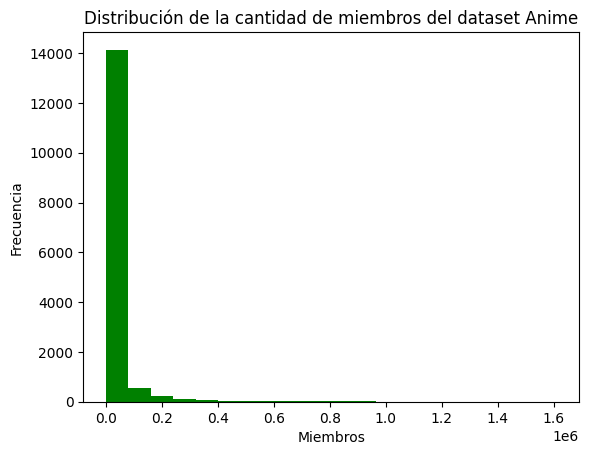

In [164]:
# Vamos a graficarlo

df['members'].plot(kind='hist', bins=20, color='green')
plt.title('Distribución de la cantidad de miembros del dataset Anime')
plt.xlabel('Miembros')
plt.ylabel('Frecuencia')
plt.show()

<Axes: xlabel='members', ylabel='Count'>

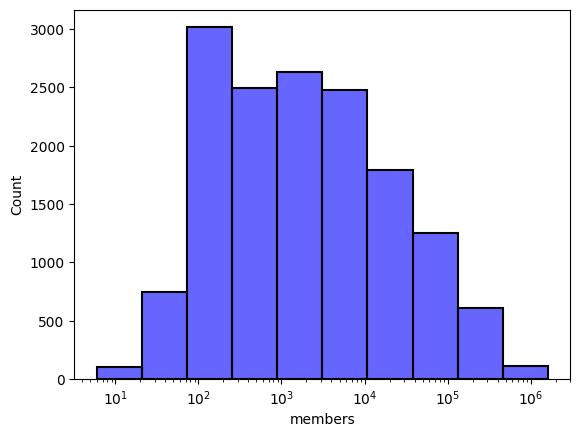

In [207]:
sns.histplot(df['members'], bins=10, color='blue', alpha=0.6, linewidth=1.5, edgecolor='black', log_scale=True)

### 10. ¿Cuál es el anime que más miembros tiene y cual es el nombre del anime?

In [165]:
max_members = df[df['members'] == df['members'].max()] # Selecciona las filas donde el valor de la columna 'members' sea igual al valor máximo en esa misma columna

In [166]:
max_members[['name', 'members']] # Y de esa fila filtrada quiero el nombre y los miembros

,name,members
1311,Death Note,1610561.0


### 11. ¿Cuántos animes se han adaptado de un manga?

In [167]:
df.head()

,animeID,name,title_japanese,title_synonyms,type,source,producers,genre,studio,episodes,status,airing,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,synopsis,related
0,1,Cowboy Bebop,カウボーイビバップ,[],TV,Original,['Bandai Visual'],"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",['Sunrise'],26.0,Finished Airing,False,"{'from': '1998-04-03T00:00:00+00:00', 'to': '1...",24 min per ep,R - 17+ (violence & profanity),8.81,405664.0,26.0,39.0,795733.0,43460.0,"In the year 2071, humanity has colonized sever...","{'Adaptation': [{'mal_id': 173, 'type': 'manga..."
1,5,Cowboy Bebop: Tengoku no Tobira,カウボーイビバップ 天国の扉,"[""Cowboy Bebop: Knockin' on Heaven's Door""]",Movie,Original,"['Sunrise', 'Bandai Visual']","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",['Bones'],1.0,Finished Airing,False,"{'from': '2001-09-01T00:00:00+00:00', 'to': No...",1 hr 55 min,R - 17+ (violence & profanity),8.41,120243.0,164.0,449.0,197791.0,776.0,"Another day, another bounty—such is the life o...","{'Parent story': [{'mal_id': 1, 'type': 'anime..."
2,6,Trigun,トライガン,[],TV,Manga,['Victor Entertainment'],"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",['Madhouse'],26.0,Finished Airing,False,"{'from': '1998-04-01T00:00:00+00:00', 'to': '1...",24 min per ep,PG-13 - Teens 13 or older,8.30,212537.0,255.0,146.0,408548.0,10432.0,"Vash the Stampede is the man with a $$60,000,0...","{'Adaptation': [{'mal_id': 703, 'type': 'manga..."
3,7,Witch Hunter Robin,Witch Hunter ROBIN,['WHR'],TV,Original,['Bandai Visual'],"['Action', 'Magic', 'Police', 'Supernatural', ...",['Sunrise'],26.0,Finished Airing,False,"{'from': '2002-07-02T00:00:00+00:00', 'to': '2...",25 min per ep,PG-13 - Teens 13 or older,7.33,32837.0,2371.0,1171.0,79397.0,537.0,Witches are individuals with special powers li...,{}
4,8,Bouken Ou Beet,冒険王ビィト,['Adventure King Beet'],TV,Manga,"['TV Tokyo', 'Dentsu']","['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",['Toei Animation'],52.0,Finished Airing,False,"{'from': '2004-09-30T00:00:00+00:00', 'to': '2...",23 min per ep,PG - Children,7.03,4894.0,3544.0,3704.0,11708.0,14.0,It is the dark century and the people are suff...,"{'Adaptation': [{'mal_id': 1348, 'type': 'mang..."


In [168]:
len(df[df['source']== 'Manga'])


3244

### 12. ¿Cuántos animes tienen una puntuación superior a 8.0?

In [169]:
len(df[df['score']> 8])

580

### 13. ¿Cuál es el estudio que ha producido más animes?

In [170]:
df['studio'].value_counts()

[]                                        6315
['Toei Animation']                         720
['Sunrise']                                445
['J.C.Staff']                              321
['Madhouse']                               305
                                          ... 
['Studio Pierrot', 'Studio Hibari']          1
['Artmic', 'animate Film']                   1
['Anima']                                    1
['OLM', 'P.A. Works']                        1
['Production I.G', 'Nihon Ad Systems']       1
Name: studio, Length: 853, dtype: int64

### 14. ¿Cuál es la duración media de los top5 anime mas populares?  

In [171]:
# primero sacamos los animes mas populares basandonos en la cantidad de miembros 

top5 = df.sort_values('members',ascending=False).head()

In [172]:
top5[['name', 'duration']]

,name,duration
1311,Death Note,23 min per ep
7233,Shingeki no Kyojin,24 min per ep
6396,Sword Art Online,23 min per ep
3769,Fullmetal Alchemist: Brotherhood,24 min per ep
10238,One Punch Man,24 min per ep


In [173]:
top5['duration']

1311     23 min per ep
7233     24 min per ep
6396     23 min per ep
3769     24 min per ep
10238    24 min per ep
Name: duration, dtype: object

In [174]:
# Vamos a extraer el numero de minutos
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)

top5['duration'] = top5['duration'].str.extract('(\d+)').astype(float)
# \d: Returns a match where the string contains digits (numbers from 0-9)

In [175]:
top5['duration']

1311     23.0
7233     24.0
6396     23.0
3769     24.0
10238    24.0
Name: duration, dtype: float64

In [176]:
top5['duration'].mean()

23.6

### 15. ¿Cuáles son los 3 estudios con más animes creados? Ordénalos en orden descendente

In [177]:
df['studio'].value_counts().head(4)

[]                    6315
['Toei Animation']     720
['Sunrise']            445
['J.C.Staff']          321
Name: studio, dtype: int64

### 16. ¿Cuál es el 'score' medio para cada categoría 'type'?

In [178]:
df['score'].groupby(df['type']).mean()

type
Movie      6.236139
Music      5.197919
ONA        5.705201
OVA        6.272967
Special    6.341698
TV         6.730801
Unknown    6.204951
Name: score, dtype: float64

### 17. ¿Cuántas películas y cuántas series hay en la lista?

In [179]:
df['type'].value_counts()

TV         4407
OVA        3627
Movie      2760
Special    2052
ONA        1377
Music      1020
Unknown      35
Name: type, dtype: int64

### 18. ¿Cuál es la duración media de las películas?


In [180]:
df[df['type'] == 'Movie']['duration'].mean()


11.248166730991896

### 19. ¿Cuál es la duración media de los capítulos de las series?


In [181]:
df[df['type'] == 'TV']['duration'].mean()

19.96049847166706

### 20. ¿Cuántos del top 10 favoritos son movies y cuántos series?

In [182]:
top10_favorites = df.sort_values('favorites',ascending=False).head(10)
top10_favorites

# Otra manera
# top10_favorites = df.nlargest(10, 'favorites')

,animeID,name,title_japanese,title_synonyms,type,source,producers,genre,studio,episodes,status,airing,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,synopsis,related
3769,5114,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,['Hagane no Renkinjutsushi: Fullmetal Alchemis...,TV,Manga,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Action', 'Adventure', 'Comedy', 'Drama', 'Fa...",['Bones'],64.000000,Finished Airing,False,"{'from': '2009-04-05T00:00:00+00:00', 'to': '2...",24.0,R - 17+ (violence & profanity),9.24,826899.0,1.0,4.0,1355349.0,120331.0,"""In order for something to be obtained, someth...","{'Adaptation': [{'mal_id': 25, 'type': 'manga'..."
5470,9253,Steins;Gate,STEINS;GATE,[],TV,Visual novel,"['Frontier Works', 'Media Factory', 'Movic', '...","['Thriller', 'Sci-Fi']",['White Fox'],24.000000,Finished Airing,False,"{'from': '2011-04-06T00:00:00+00:00', 'to': '2...",24.0,PG-13 - Teens 13 or older,9.14,633590.0,3.0,7.0,1139182.0,104173.0,The self-proclaimed mad scientist Rintarou Oka...,"{'Adaptation': [{'mal_id': 17517, 'type': 'man..."
1311,1535,Death Note,デスノート,['DN'],TV,Manga,"['VAP', 'Konami', 'Ashi Production', 'Nippon T...","['Mystery', 'Police', 'Psychological', 'Supern...",['Madhouse'],37.000000,Finished Airing,False,"{'from': '2006-10-04T00:00:00+00:00', 'to': '2...",23.0,R - 17+ (violence & profanity),8.66,1107955.0,54.0,1.0,1610561.0,96146.0,"A shinigami, as a god of death, can kill any p...","{'Adaptation': [{'mal_id': 21, 'type': 'manga'..."
10,21,One Piece,ONE PIECE,['OP'],TV,Manga,"['Fuji TV', 'TAP', 'Shueisha']","['Action', 'Adventure', 'Comedy', 'Super Power...",['Toei Animation'],11.722011,Currently Airing,True,"{'from': '1999-10-20T00:00:00+00:00', 'to': No...",24.0,PG-13 - Teens 13 or older,8.53,465454.0,94.0,36.0,803871.0,76869.0,"Gol D. Roger was known as the ""Pirate King,"" t...","{'Adaptation': [{'mal_id': 13, 'type': 'manga'..."
6258,11061,Hunter x Hunter (2011),HUNTER×HUNTER（ハンター×ハンター）,['HxH (2011)'],TV,Manga,"['VAP', 'Nippon Television Network', 'Shueisha']","['Action', 'Adventure', 'Fantasy', 'Shounen', ...",['Madhouse'],148.000000,Finished Airing,False,"{'from': '2011-10-02T00:00:00+00:00', 'to': '2...",23.0,PG-13 - Teens 13 or older,9.12,468889.0,5.0,30.0,840943.0,76048.0,Hunter x Hunter is set in a world where Hunter...,"{'Adaptation': [{'mal_id': 26, 'type': 'manga'..."
7233,16498,Shingeki no Kyojin,進撃の巨人,['AoT'],TV,Manga,"['Production I.G', 'Dentsu', 'Mainichi Broadca...","['Action', 'Military', 'Mystery', 'Super Power...",['Wit Studio'],25.000000,Finished Airing,False,"{'from': '2013-04-07T00:00:00+00:00', 'to': '2...",24.0,R - 17+ (violence & profanity),8.48,1038161.0,116.0,2.0,1500958.0,70555.0,"Centuries ago, mankind was slaughtered to near...","{'Adaptation': [{'mal_id': 23390, 'type': 'man..."
1349,1575,Code Geass: Hangyaku no Lelouch,コードギアス 反逆のルルーシュ,[],TV,Original,"['Bandai Visual', 'Mainichi Broadcasting Syste...","['Action', 'Drama', 'Mecha', 'Military', 'Scho...",['Sunrise'],25.000000,Finished Airing,False,"{'from': '2006-10-06T00:00:00+00:00', 'to': '2...",24.0,R - 17+ (violence & profanity),8.77,681621.0,32.0,11.0,1082349.0,68684.0,"In the year 2010, the Holy Empire of Britannia...","{'Adaptation': [{'mal_id': 1528, 'type': 'mang..."
1712,2001,Tengen Toppa Gurren Lagann,天元突破グレンラガン,"['Tengen Toppa Gurren-Lagann', 'Making Break-T...",TV,Original,"['TV Tokyo', 'Aniplex', 'Dentsu', 'Konami', 'H...","['Action', 'Adventure', 'Comedy', 'Mecha', 'Sc...",['Gainax'],27.000000,Finished Airing,False,"{'from': '2007-04-01T00:00:00+00:00', 'to': '2...",24.0,PG-13 - Teens 13 or older,8.72,490692.0,42.0,25.0,868611.0,54079.0,Simon and Kamina were born and raised in a dee...,"{'Adaptation': [{'mal_id': 1648, 'type': 'mang..."
6396,11757,Sword Art Online,ソードアート・オンライン,"['S.A.O', 'SAO']",TV,Light novel,"['Aniplex', 'Genco', 'DAX Production', 'ASCII ...","['Action', 'Adventure', 'Fantasy', 'Game', 'Ro...",['A-1 Pictures'],25.000000,Finished Airing,False,

### 21. Top10 ranking

In [183]:
df.nlargest(10, 'rank')


,animeID,name,title_japanese,title_synonyms,type,source,producers,genre,studio,episodes,status,airing,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,synopsis,related
14645,38285,Zuori Qing Kong Pilot,昨日青空（动画样片）,['Zuo Ri Qing Kong Pilot'],ONA,Manga,[],"['Drama', 'Romance', 'School', 'Slice of Life']",['Seven Stone Entertainment'],1.0,Finished Airing,False,"{'from': '2014-01-21T00:00:00+00:00', 'to': No...",4.0,PG-13 - Teens 13 or older,5.46,35.0,13838.0,10638.0,406.0,1.0,"In the late 90's, in China, Tu Xiaoyi, an high...","{'Adaptation': [{'mal_id': 83849, 'type': 'man..."
13936,37207,Zuori Qing Kong,昨日青空,['Zuo Ri Qing Kong'],Movie,Manga,['Beijing Enlight Pictures'],"['Drama', 'Romance', 'School', 'Slice of Life']",['Guton Animation Studio'],1.0,Finished Airing,False,"{'from': '2018-10-26T00:00:00+00:00', 'to': No...",1.0,PG-13 - Teens 13 or older,7.57,23.0,13837.0,5467.0,4570.0,2.0,"In the late 90's, in China, Tu Xiaoyi, an high...","{'Adaptation': [{'mal_id': 83849, 'type': 'man..."
13510,36559,Zukkoke Sannin-gumi: Kusunoki Yashiki no Gurug...,ズッコケ三人組 楠屋敷のグルグル様,[],Special,Unknown,['Nippon Television Network'],"['Demons', 'Kids']",['J.C.Staff'],1.0,Finished Airing,False,"{'from': '1995-11-11T00:00:00+00:00', 'to': No...",45.0,PG - Children,5.93,15.0,13834.0,14580.0,75.0,0.0,No synopsis has been added for this series yet...,"{'Other': [{'mal_id': 11497, 'type': 'anime', ..."
12672,35149,Zukkoke Sannin-gumi no Koutsuu Anzen,ズッコケ三人組のこうつうあんぜん,[],OVA,Unknown,[],"['Drama', 'Kids']",[],1.0,Finished Airing,False,"{'from': None, 'to': None, 'prop': {'from': {'...",12.0,G - All Ages,4.57,7.0,13832.0,14729.0,66.0,0.0,An traffic safety video for kids featuring the...,"{'Alternative version': [{'mal_id': 11497, 'ty..."
12626,35099,Zukkoke Sannin-gumi no Jitensha Kyoushitsu,ッコケ三人組の自転車教室,[],OVA,Other,[],"['Drama', 'Kids']",[],1.0,Finished Airing,False,"{'from': '2016-01-01T00:00:00+00:00', 'to': No...",14.0,G - All Ages,5.80,10.0,13831.0,14647.0,70.0,0.0,An educational bicycle safety video for kids f...,"{'Alternative version': [{'mal_id': 11497, 'ty..."
12627,35100,Zukkoke Sannin-gumi no Bousai Kyoushitsu,ズッコケ三人組のぼうさい教室,[],OVA,Other,[],"['Drama', 'Kids']",[],1.0,Finished Airing,False,"{'from': '2016-01-01T00:00:00+00:00', 'to': No...",14.0,G - All Ages,5.75,8.0,13829.0,14728.0,66.0,0.0,An educational earthquake disaster prevention ...,"{'Alternative version': [{'mal_id': 11497, 'ty..."
12622,35094,Zou no Hanako,象のハナ子,[],OVA,Other,[],"['Drama', 'Historical']",[],1.0,Finished Airing,False,"{'from': '1969-04-01T00:00:00+00:00', 'to': No...",1.0,G - All Ages,5.33,6.0,13826.0,14691.0,68.0,0.0,"In the midst of WWII when food was scarce, the...",{}
13046,35734,"Zoojazoo ""Watashi no Onaka""",ズージャズー「わたしのおなか」,[],Music,Unknown,[],['Music'],[],1.0,Finished Airing,False,"{'from': '2015-12-08T00:00:00+00:00', 'to': No...",2.0,G - All Ages,4.26,42.0,13825.0,14301.0,89.0,0.0,(360° VR) Animation Video by Asami Ike.,{}
14531,38078,Zoo: Hidamari no Shi,ZOO 「陽だまりの詩（シ）」,['Zoo: Hidamari no Uta'],Movie,Novel,['Toei Video'],['Sci-Fi'],['Kamikaze Douga'],1.0,Finished Airing,False,"{'from': '2005-03-19T00:00:00+00:00', 'to': No...",13.0,PG-13 - Teens 13 or older,6.65,37.0,13824.0,14023.0,104.0,0.0,A man makes a robot girl and tries to teach he...,{}
14579,38136,Zhu Zhu Xia: Zhong Ji Jue Zhan - Qian Ye Pian,豬豬俠 終極決戰前夜篇,[],TV,Original,[],"['Sci-Fi', 'Super Power', 'Kids']",[],52.0,Finished Airing,False,"{'from': '2015-06-10T00:00:00+00:00', 'to': '2...",15.0,G - All Ages,4.42,12.0,13816.0,15147.0,42.0,0.0,A prequel TV series setting up for the Zhu Zhu...,"{'Parent story': [{'mal_id': 38126, 'type': 'a..."


### 22. ¿Cuántos se emitieron por primera vez en la década de los 90?


In [184]:
df['aired'].head()

0    {'from': '1998-04-03T00:00:00+00:00', 'to': '1...
1    {'from': '2001-09-01T00:00:00+00:00', 'to': No...
2    {'from': '1998-04-01T00:00:00+00:00', 'to': '1...
3    {'from': '2002-07-02T00:00:00+00:00', 'to': '2...
4    {'from': '2004-09-30T00:00:00+00:00', 'to': '2...
Name: aired, dtype: object

In [185]:
df['aired'].tail() # algunas no tienen fecha, por lo que duero me darán valor nulo

15273    {'from': None, 'to': None, 'prop': {'from': {'...
15274    {'from': None, 'to': None, 'prop': {'from': {'...
15275    {'from': '2018-07-17T00:00:00+00:00', 'to': No...
15276    {'from': None, 'to': None, 'prop': {'from': {'...
15277    {'from': None, 'to': None, 'prop': {'from': {'...
Name: aired, dtype: object

In [186]:
# Utilizamos expresiones regulares para extraer la fecha
df['aired'] = df['aired'].str.extract('(\d{4})').astype(float)

In [187]:
df['aired'].tail()

15273       NaN
15274       NaN
15275    2018.0
15276       NaN
15277       NaN
Name: aired, dtype: float64

In [188]:
df[(df['aired'] >= 1990) & (df['aired'] < 2000)].shape[0]

1957

---
## GRÁFICAS

Ahora vamos a graficar la distribución de los datos para implementar los conocimientos adquiridos de ``matplotlib`` y ``seaborn``

### 1. Graficar los 10 animes con más miembros

In [189]:
top10_members = df.sort_values('members',ascending=False).head(10)

Text(0.5, 1.0, 'Top 10 Animes (por miembros)')

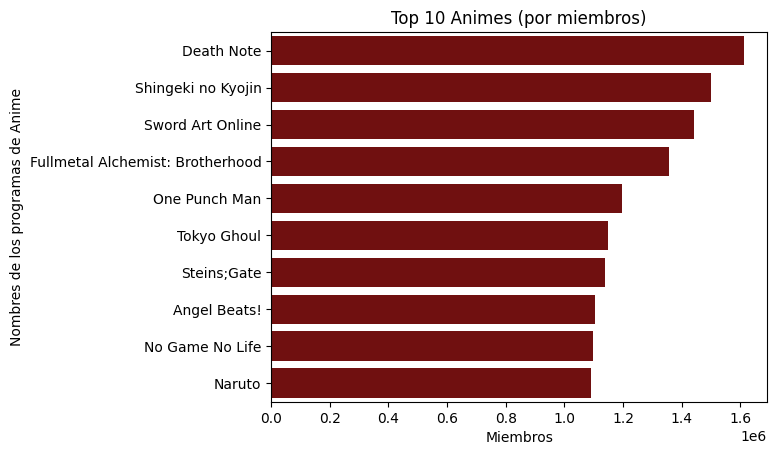

In [190]:
# Vamos a graficarlo

sns.barplot(x="members", y="name", data=top10_members, color = 'maroon')

# Etiquetas de los ejes
plt.xlabel("Miembros")
plt.ylabel("Nombres de los programas de Anime")
plt.title('Top 10 Animes (por miembros)')

### 2. Crear un gráfico de dispersión de la cantidad de miembros vs la puntuación de los animes

In [191]:
df.columns

Index(['animeID', 'name', 'title_japanese', 'title_synonyms', 'type', 'source',
       'producers', 'genre', 'studio', 'episodes', 'status', 'airing', 'aired',
       'duration', 'rating', 'score', 'scored_by', 'rank', 'popularity',
       'members', 'favorites', 'synopsis', 'related'],
      dtype='object')

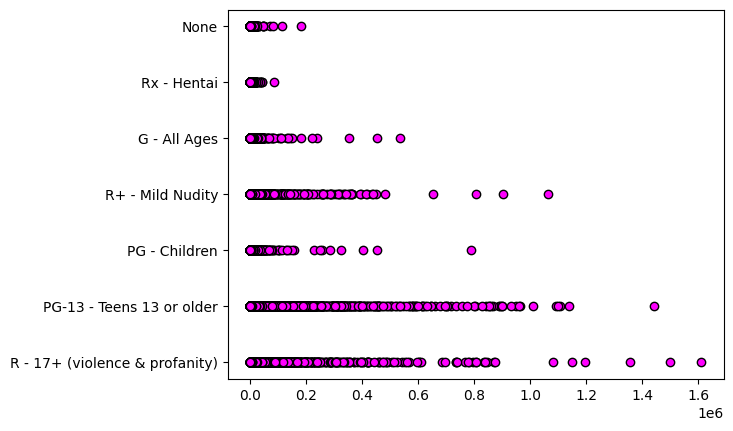

In [192]:
plt.scatter('members','rating', color = 'magenta',marker='o',edgecolors='black',alpha=1,data=df)

### 3. Graficar la correlación entre la puntuación y la cantidad de miembros
 

Text(0, 0.5, 'Puntuación de los Animes')

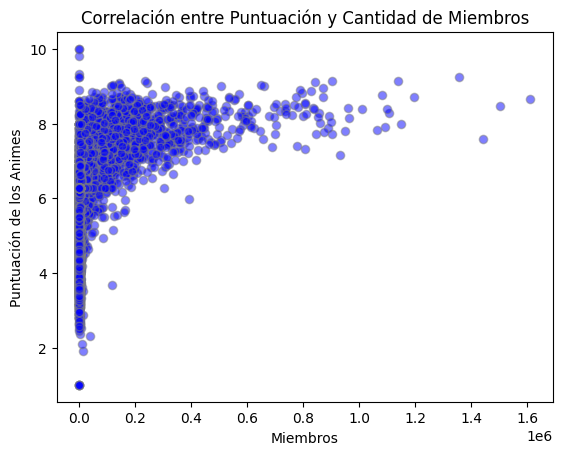

In [193]:
plt.scatter('members','score', color = 'blue',marker='o',edgecolors='grey',alpha=0.5,data=df)
# Agregar título y etiquetas de ejes
plt.title('Correlación entre Puntuación y Cantidad de Miembros')
plt.xlabel('Miembros')
plt.ylabel('Puntuación de los Animes')

### 4. Graficar la duración media de los top5 animes más populares

In [210]:
# Calculamos los top5 de Animes más populares según sus miembros
top5 = df.sort_values('members',ascending=False).head()

Text(0.5, 0, '')

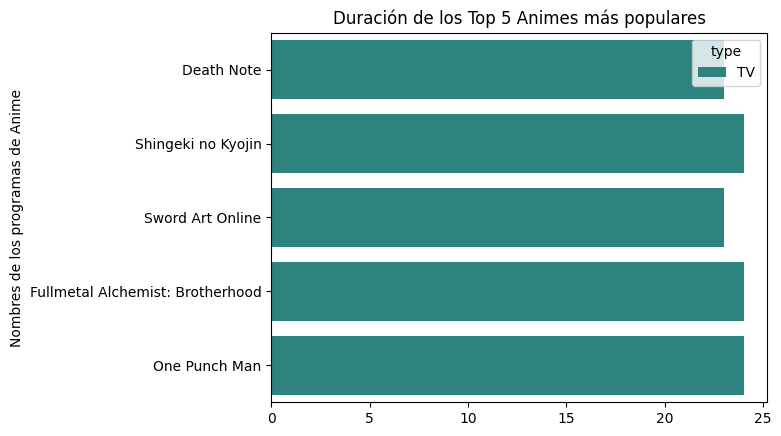

In [211]:
# Vamos a graficarlo

sns.barplot(x="duration", y='name', hue='type',data=top5, palette = 'viridis')

# Etiquetas de los ejes

plt.ylabel("Nombres de los programas de Anime")
plt.title('Duración de los Top 5 Animes más populares')

# Ocultar el nombre del eje x
plt.xlabel('')

### 5. Graficar de forma linear la popularidad vs el tiempo de duración

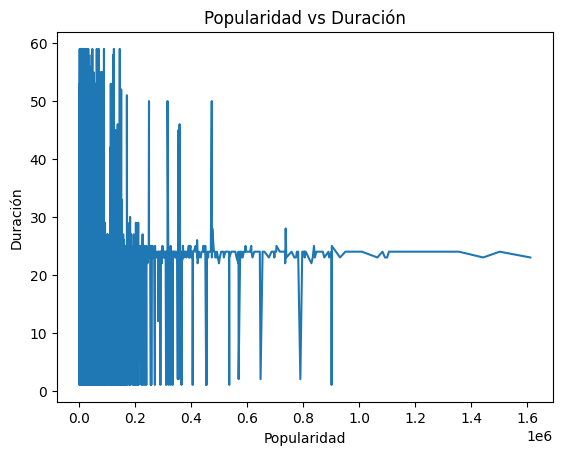

In [213]:
sns.lineplot(x='members', y='duration', data=df)
plt.title('Popularidad vs Duración', fontsize=12)
plt.xlabel('Popularidad')
plt.ylabel('Duración')
plt.show()

### 6. Graficar los top10 animes de Toei Animation

In [197]:
df.columns

Index(['animeID', 'name', 'title_japanese', 'title_synonyms', 'type', 'source',
       'producers', 'genre', 'studio', 'episodes', 'status', 'airing', 'aired',
       'duration', 'rating', 'score', 'scored_by', 'rank', 'popularity',
       'members', 'favorites', 'synopsis', 'related'],
      dtype='object')

In [198]:
df['studio'].unique()

array(["['Sunrise']", "['Bones']", "['Madhouse']", "['Toei Animation']",
       "['J.C.Staff']", "['Nippon Animation']", "['A.C.G.T.']",
       "['Studio Pierrot']", "['Trans Arts']", "['Gonzo']",
       "['Studio Deen']", "['Gainax', 'Tatsunoko Production']",
       "['Gainax', 'Production I.G']", "['OLM']", "['Production I.G']",
       "['Studio Gallop', 'Studio Deen']", "['Studio Gallop']",
       "['Tokyo Movie Shinsha']", "['Bee Train']", "['AIC']",
       "['Hal Film Maker']", "['Digital Frontier']",
       "['Bee Train', 'Xebec']", "['Xebec']", "['feel.', 'Zexcs']",
       "['Daume']", "['Nomad']", "['Kyoto Animation']", "['Seven Arcs']",
       "['Xebec', 'Asread']", "['Sunrise', 'Studio Hibari']",
       "['Sunrise', 'Studio Deen']", "['Sunrise', 'Nakamura Production']",
       "['TMS Entertainment']", "['Imagin', 'Studio Live']", "['Zexcs']",
       "['Telecom Animation Film']",
       "['ufotable', 'feel.', 'Studio Flag']", "['Studio Matrix']",
       "['TNK']", "['Gainax', 

In [199]:
df[df['studio'].str.contains('Toei Animation')].shape[0]

740

In [200]:
# Tenemos que limpiar el nombre de la columna 'studio', porque pone ['Toei Animation']
df['studio'] = df['studio'].str.replace('[', '').str.replace(']', '') # Le quito corchetes
df['studio'] = df['studio'].str.replace("'", '') # Le quito comillas

C:\Users\kina5\AppData\Local\Temp\ipykernel_4472\1622692233.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['studio'] = df['studio'].str.replace('[', '').str.replace(']', '') # Le quito corchetes


In [201]:
df[df['name']=='Dragon Ball']

,animeID,name,title_japanese,title_synonyms,type,source,producers,genre,studio,episodes,status,airing,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,synopsis,related
180,223,Dragon Ball,ドラゴンボール,"['Dragonball', 'DB']",TV,Manga,['Fuji TV'],"['Adventure', 'Comedy', 'Fantasy', 'Martial Ar...",Toei Animation,153.0,Finished Airing,False,1986.0,24.0,PG-13 - Teens 13 or older,8.14,312333.0,382.0,99.0,491047.0,9545.0,Gokuu Son is a young boy who lives in the wood...,"{'Adaptation': [{'mal_id': 42, 'type': 'manga'..."


In [202]:
# Filtramos el df solo con los Animes del estudio Toei Animation
studio_Toei = df[df['studio']=='Toei Animation']

In [203]:
# Calculamos el top10 en base a los miembros
top10_Toei = studio_Toei.sort_values('members',ascending=False).head(10)

Text(0.5, 1.0, 'Top 10 Animes de Toei Animation')

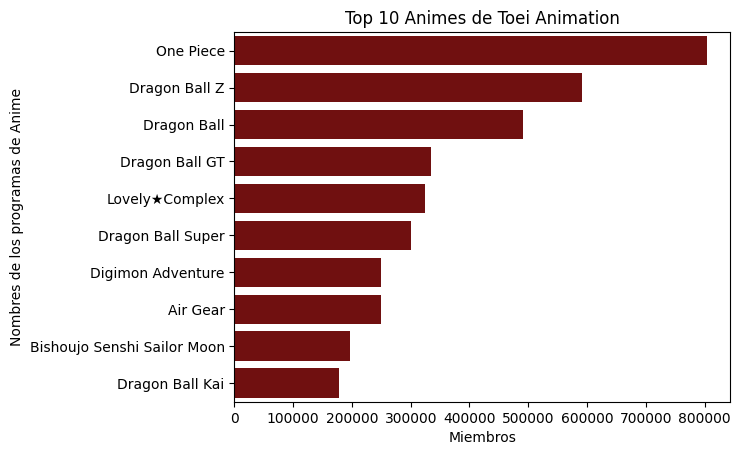

In [204]:
# Vamos a graficarlo

sns.barplot(x="members", y="name", data=top10_Toei, color = 'maroon')

# Etiquetas de los ejes
plt.xlabel("Miembros")
plt.ylabel("Nombres de los programas de Anime")
plt.title('Top 10 Animes de Toei Animation')

### 7. Hacer una selección de variables que consideremos importantes y luego un pairplot para ver la relacion entre ellas

In [205]:
df7 = df[['members', 'score', 'duration', 'type']]

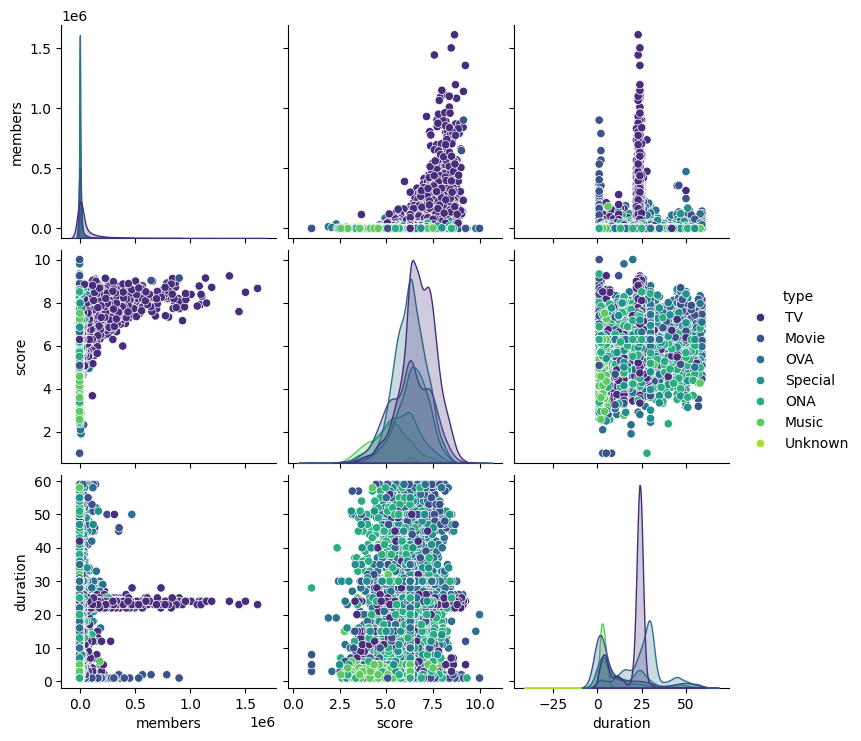

In [206]:
sns.pairplot(df7, kind='scatter', diag_kind='kde', palette='viridis', hue = 'type')